This post is for a better understanding of Batch gradient descent, and his two 

# Here we have a task of Linear Regression

In [5]:
import numpy as np

# Size of the points dataset.
m = 20

# Points x-coordinate and dummy value (x0, x1).
X0 = np.ones((m, 1))
X1 = np.arange(1, m+1).reshape(m, 1)
X = np.hstack((X0, X1))

# Points y-coordinate
y = np.array([
    3, 4, 5, 5, 2, 4, 7, 8, 11, 8, 12,
    11, 13, 13, 16, 17, 18, 17, 19, 21
]).reshape(m, 1)


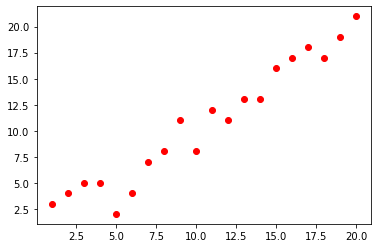

In [11]:
import matplotlib.pyplot as plt
plt.plot(X1, y, 'ro')

# After looking at the plot, we smartly figure out that a linear function might just be good enough.

\begin{equation*}
y  = \theta_0+\theta_1 x
\end{equation*}

Now the task is to get $\theta_0$ and $\theta_1$. Using BGD, we need to do:

 - define a cost function:
 
 \begin{equation*}
J  = \frac {1}{2m} \sum_{i=1}^{m}(y^{'} - y)^2 = \frac {1}{2m} \sum_{i=1}^{m}(\theta_0+\theta_1 x - y)^2 
\end{equation*}

where m is the total number of points.

 - calculate the descent with respect to $\theta_0$ and $\theta_1$:
 
\begin{align}
\frac{\partial J}{\partial \theta_0}  =  \frac {1}{m} \sum_{i=1}^{m}(\theta_0+\theta_1 x - y) \\
\frac{\partial J}{\partial \theta_1}  =  \frac {1}{m} \sum_{i=1}^{m}(\theta_0+\theta_1 x - y)x
\end{align}
 
 - define a initial value for $\theta_0$ and $\theta_1$, $\mathbf{\theta}^0$. **Using this intial valude of $\theta_0$ and $\theta_1$, and the x, y, the descent can be easily calculated.**
 
 - define a learning rate alpha.
 
 - iteratively update the $\theta_0$ and $\theta_1$ based on the descent and learning rate, untill the descent is smaller than a certain threshold.


**Belwo is the core of BGD: updating the parameters. Note that the $\mathbf{\theta}$ in the picture is a vector, i.e., $\mathbf{\theta} = [\theta_0, \theta_1]$.**

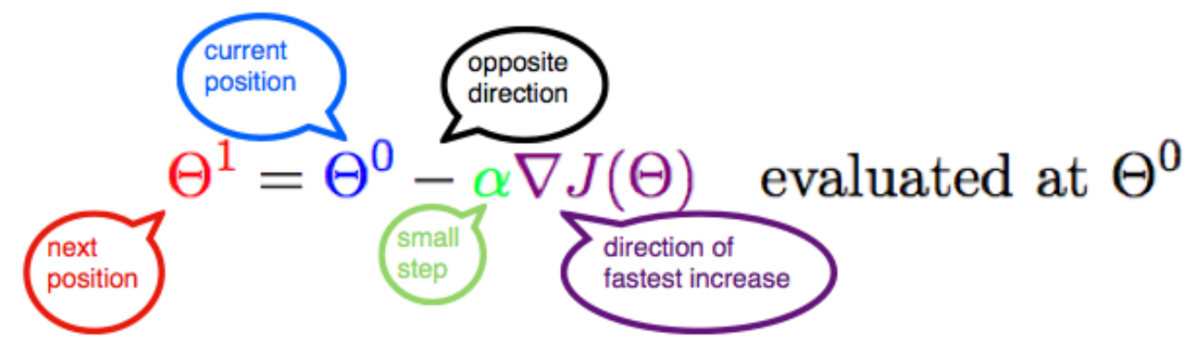

In [13]:
from IPython.display import Image
Image(filename=r'files/sgd.png')

More generally in deep learning:

https://arxiv.org/pdf/1609.04747.pdf

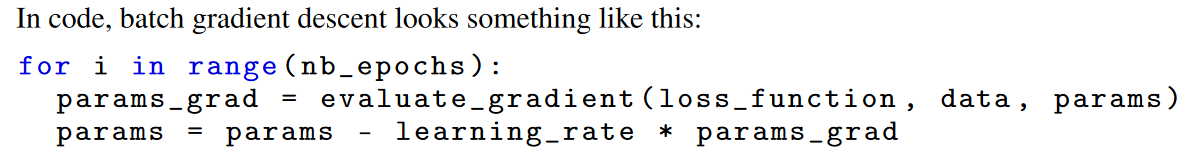

In [25]:
from IPython.display import Image
Image(filename=r'files/gdCode.png')

Batch gradient descent is guaranteed to converge to the globalminimum for convex error surfaces and to a local minimum for non-convex surfaces.

#  Check out the code for this process

Importantly, the cost function and the descent are changed in a form of matrix multiplicaiton, in order to speed up.

In [2]:
def error_function(theta, X, y):
    '''Error function J definition.'''
    diff = np.dot(X, theta) - y
    return (1./2*m) * np.dot(np.transpose(diff), diff)

def gradient_function(theta, X, y):
    '''Gradient of the function J definition.'''
    diff = np.dot(X, theta) - y
    return (1./m) * np.dot(np.transpose(X), diff)


In [3]:
def gradient_descent(X, y, alpha):
    '''Perform gradient descent.'''
    theta = np.array([1, 1]).reshape(2, 1)
    gradient = gradient_function(theta, X, y)
    while not np.all(np.absolute(gradient) <= 1e-5):
        theta = theta - alpha * gradient
        gradient = gradient_function(theta, X, y)
    return theta


In [16]:
alpha = 0.01
print(np.size(y), X.shape, y.shape)
optimal = gradient_descent(X, y, alpha)
print('optimal:', optimal)
print('error function:', error_function(optimal, X, y)[0,0])

20 (20, 2) (20, 1)
optimal: [[0.51583286]
 [0.96992163]]
error function: 405.98496249324046


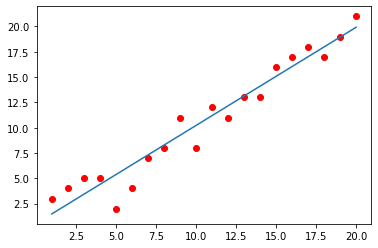

In [14]:
plt.plot(X1, y, 'ro')

Y_predict = np.dot(X, optimal)

plt.plot(X1, Y_predict)

# Stochastic gradient descent

Note that previously all 20 examples (points) are used for one update of the parameters, which is not something you have to do.

Stochastic gradient descent (SGD) in contrast performs a parameter update for **each** training example. As a result, this way of update:

- much faster and can also be used to learn online (Batch gradient descent performs redundant computations for large datasets, as it recomputes gradientsfor  similar  examples  before  each  parameter  update.) 
- lead to a high variance of the parameters that cause the objective function tofluctuate heavily 

In [27]:
def gradient_descent_sto(X, y, alpha):
    '''Perform gradient descent.'''
    theta = np.array([1, 1]).reshape(2, 1)
    
    m=np.size(y)
    for i in range(m):
        
#         print( X[i,:].shape, y[i,:].shape)
    
        gradient = gradient_function(theta, X[i,:].reshape(1,2), y[i,:].reshape(1,1))
        while not np.all(np.absolute(gradient) <= 1e-5):
            theta = theta - alpha * gradient
            gradient = gradient_function(theta, X, y)
            
    return theta

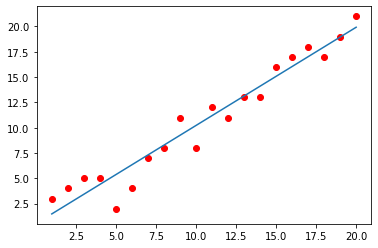

In [29]:
optimal = gradient_descent_sto(X, y, alpha)
plt.plot(X1, y, 'ro')

Y_predict_sto = np.dot(X, optimal)

plt.plot(X1, Y_predict_sto)

More generally,

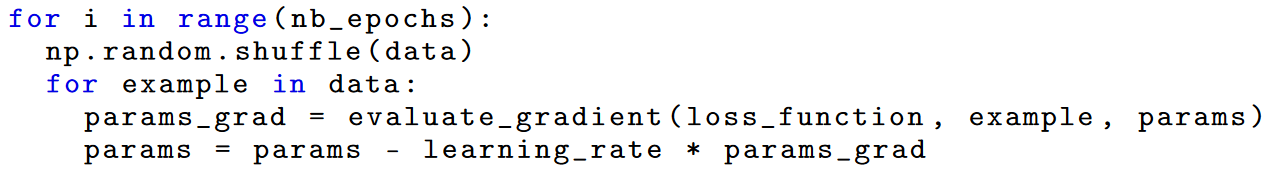

In [30]:
Image(filename=r'files/sgdCode.png')


# Mini-batch gradient descent

Mini-batch gradient descent finally takes the best of both worlds and performs an update for every mini-batch of training examples. It reduces the variance of the parameter updates, which can lead to more stable convergence.

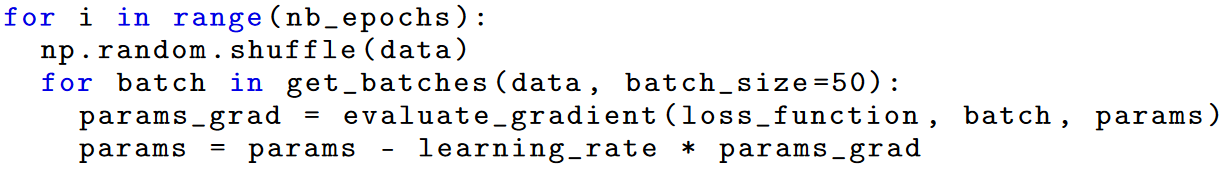

In [31]:
Image(filename=r'files/sgdCode_batch.png')

There is no need to program for our regression example, as we can do that in our head. Imagine now we have 1000, not 20 points, then here, the previously used m=20 can be seen a batch of Mini-batch gradient descent.